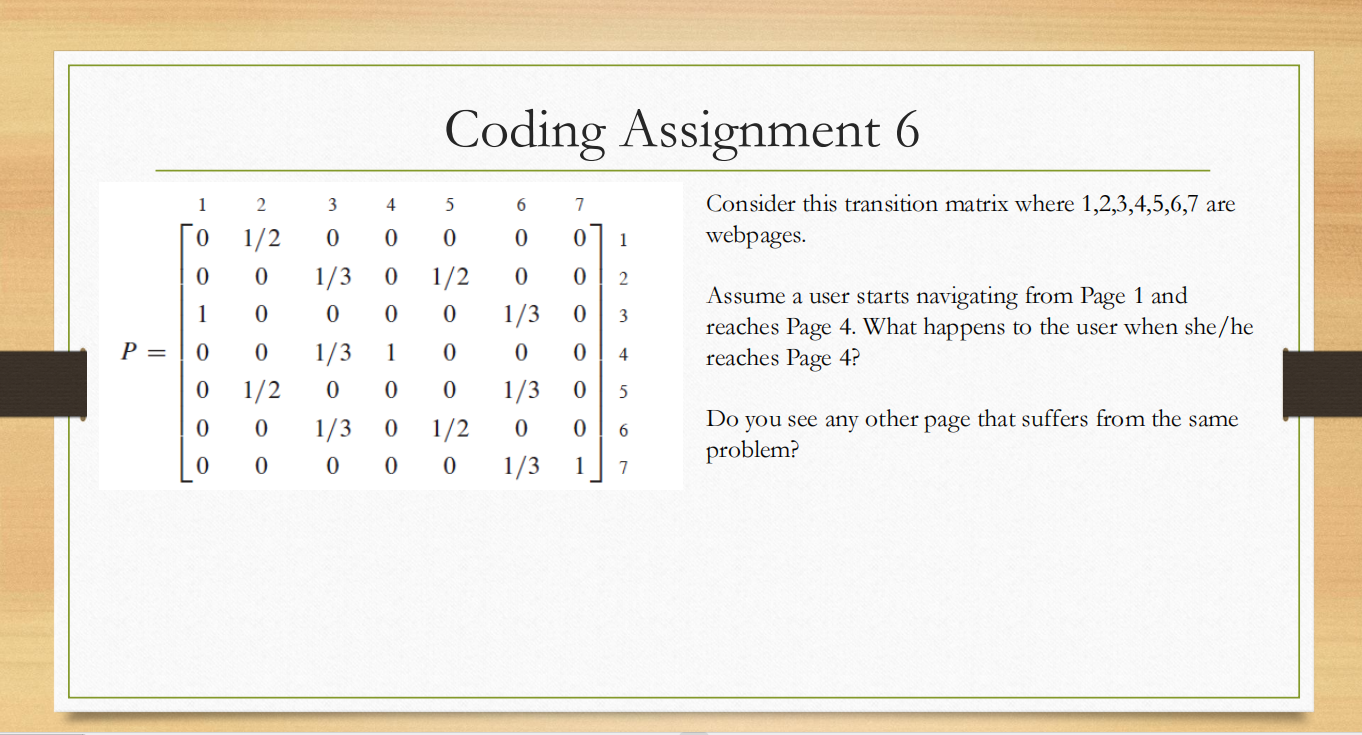

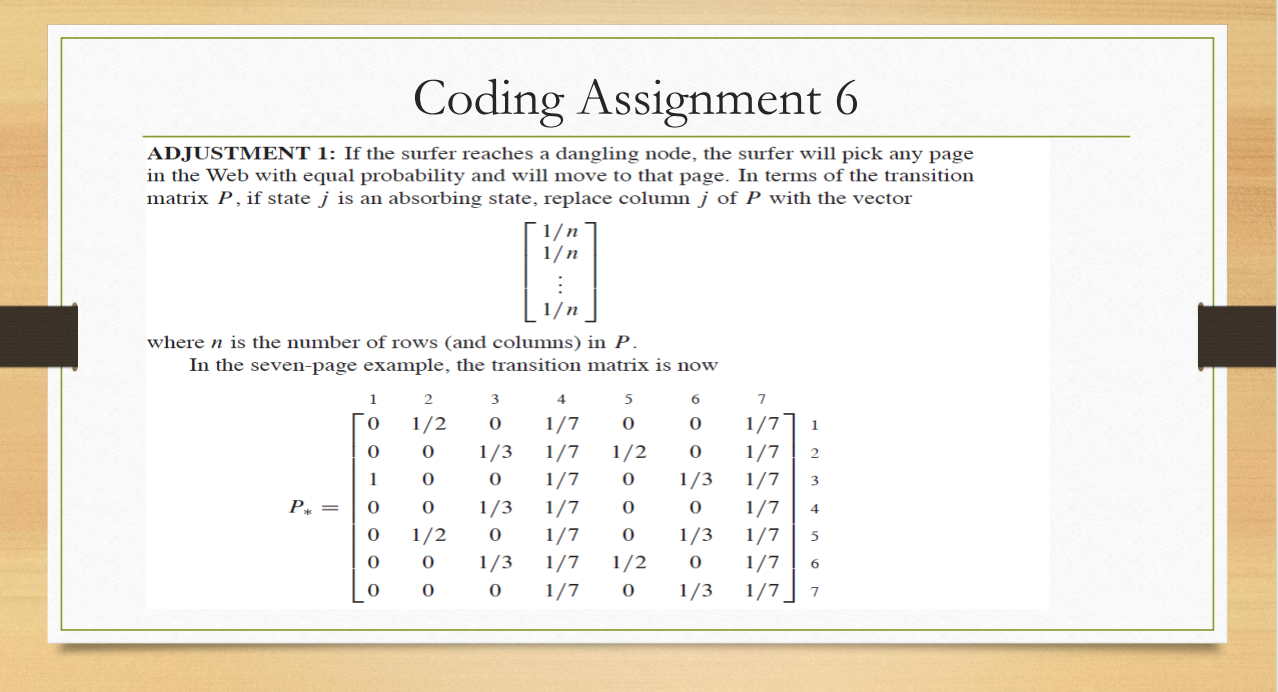

# 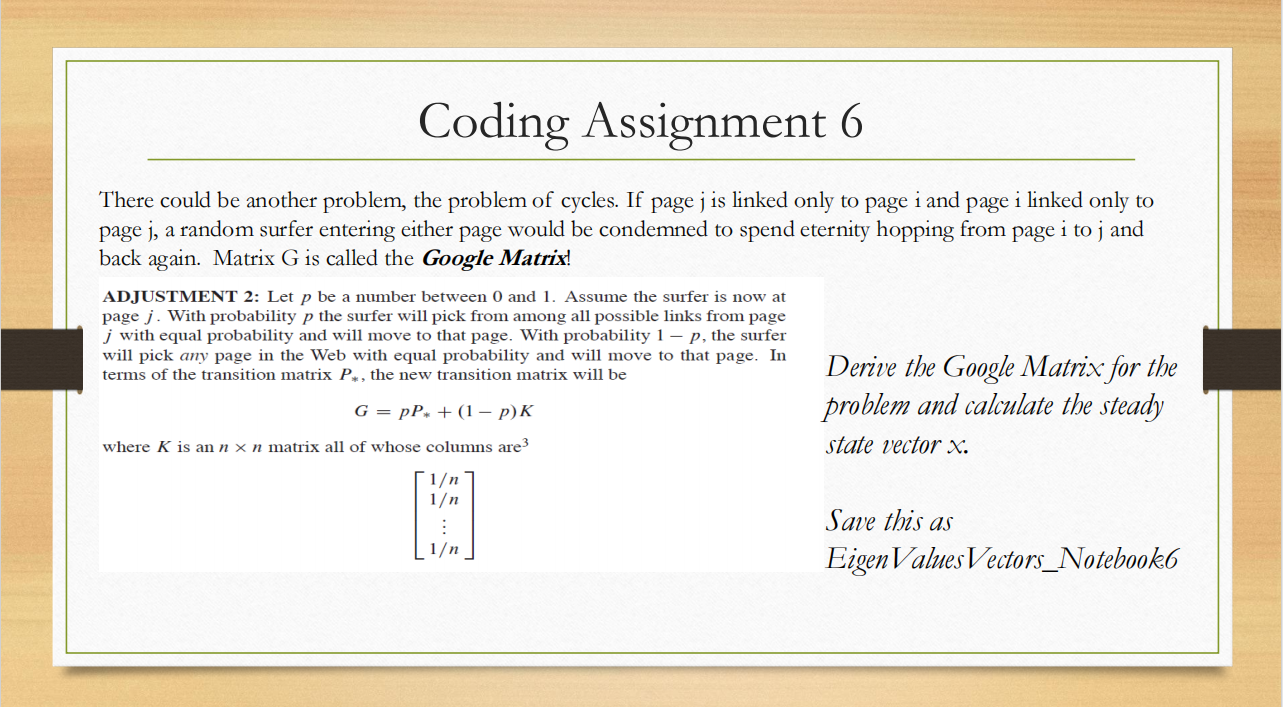

# Question 1: Assume a user starts navigating from Page 1 and reaches Page 4. What happens to the user when she/he reaches Page 4?

### When the User reaches Page 4, He can't able to move to the any other Pages.

# Question 2: Do you see any other page that suffers from the same problem?

### Page 4 and Page 7.

# ADJUSTMENT 1:
## If the suffer reaches a dangling node, the suffer will pick any page in the web with equal probability and will move to that page. In terms of the trasnsition matrix P, if state j is an absorbing state replace column j of p with vector [1/n, 1/n, 1/n ......., 1/n] where n is the number of rows in the trasition matrix.

In [87]:
import numpy as np #Import the necessary modules
P = np.array([[0,1/2,0,0,0,0,0],  # Define the Transition Matrix
              [0,0,1/3,0,1/2,0,0],
              [1,0,0,0,0,1/3,0],
              [0,0,1/3,1,0,0,0],
              [0,1/2,0,0,0,1/3,0],
              [0,0,1/3,0,1/2,0,0],
              [0,0,0,0,0,1/3,1]])
print("Transition Matrix:",P)

Transition Matrix: [[0.         0.5        0.         0.         0.         0.
  0.        ]
 [0.         0.         0.33333333 0.         0.5        0.
  0.        ]
 [1.         0.         0.         0.         0.         0.33333333
  0.        ]
 [0.         0.         0.33333333 1.         0.         0.
  0.        ]
 [0.         0.5        0.         0.         0.         0.33333333
  0.        ]
 [0.         0.         0.33333333 0.         0.5        0.
  0.        ]
 [0.         0.         0.         0.         0.         0.33333333
  1.        ]]


In [88]:
for i in range(len(P)):#Traverse by each row
    for j in range(len(P[0])):#Traverse by each column
        if(i==j and P[i,j]==1): #Find if no outer edge for a specific page by i,j is same and have the probability of 1
            for k in range(len(P)):
                P[k,j] = 1/(len(P))
print(P)

[[0.         0.5        0.         0.14285714 0.         0.
  0.14285714]
 [0.         0.         0.33333333 0.14285714 0.5        0.
  0.14285714]
 [1.         0.         0.         0.14285714 0.         0.33333333
  0.14285714]
 [0.         0.         0.33333333 0.14285714 0.         0.
  0.14285714]
 [0.         0.5        0.         0.14285714 0.         0.33333333
  0.14285714]
 [0.         0.         0.33333333 0.14285714 0.5        0.
  0.14285714]
 [0.         0.         0.         0.14285714 0.         0.33333333
  0.14285714]]


# Adjustment 2: 
## Let p be a number between 0 and 1 assume the suffer is now at page j. with probability p the suffer will pick from among all possible links from page j with equal probability and will move to the page. with probability 1-p, the suffer will pick any page in the web with equal probability and will move to that page.In terms of teh transition matrix P*.the new transition matrix will be G = pP* + (1-p)K where k is an n*n matrix all of whose columns are [1/n,1/n,....1/n]

In [89]:
def google_transition_matrix(matrix,damping_factor):
    return damping_factor*matrix + (1-damping_factor)*np.full([len(matrix),len(matrix)],(1/len(matrix))) # G = pP - (1-p) K

In [90]:
G = google_transition_matrix(P,0.8)
print(G)

[[0.02857143 0.42857143 0.02857143 0.14285714 0.02857143 0.02857143
  0.14285714]
 [0.02857143 0.02857143 0.2952381  0.14285714 0.42857143 0.02857143
  0.14285714]
 [0.82857143 0.02857143 0.02857143 0.14285714 0.02857143 0.2952381
  0.14285714]
 [0.02857143 0.02857143 0.2952381  0.14285714 0.02857143 0.02857143
  0.14285714]
 [0.02857143 0.42857143 0.02857143 0.14285714 0.02857143 0.2952381
  0.14285714]
 [0.02857143 0.02857143 0.2952381  0.14285714 0.42857143 0.02857143
  0.14285714]
 [0.02857143 0.02857143 0.02857143 0.14285714 0.02857143 0.2952381
  0.14285714]]


# Question 3: Calculate the steady state vector

In [91]:
eig_value,eig_vector = np.linalg.eig(G) #Find the eigen value and eigen vector
print("Eigen Value:")
print(eig_value.real)
print("Eigen Vector:")
print(eig_vector.real)

Eigen Value:
[ 1.00000000e+00 -3.77168062e-01 -1.84319588e-01 -1.84319588e-01
  1.74378666e-01  7.90469436e-17  7.90469436e-17]
Eigen Vector:
[[ 3.02881647e-01  2.95569452e-01  1.35034947e-01  1.35034947e-01
  -2.28994290e-02  4.55576513e-16  4.55576513e-16]
 [ 4.28491427e-01 -3.86110115e-01 -1.61261738e-01 -1.61261738e-01
  -2.83791389e-01 -2.63897440e-16 -2.63897440e-16]
 [ 4.88054774e-01 -4.67848608e-01 -6.64986092e-01 -6.64986092e-01
   8.90369050e-02  2.97419802e-16  2.97419802e-16]
 [ 2.61633016e-01  2.16866029e-01  4.75444857e-01  4.75444857e-01
   7.64236597e-01  7.07106781e-01  7.07106781e-01]
 [ 4.17146028e-01  5.68558360e-01  3.48954689e-01  3.48954689e-01
  -4.56884305e-01 -8.95957665e-18 -8.95957665e-18]
 [ 4.28491427e-01 -3.86110115e-01 -1.61261738e-01 -1.61261738e-01
  -2.83791389e-01 -4.11810825e-16 -4.11810825e-16]
 [ 2.45749457e-01  1.59074998e-01  2.80750752e-02  2.80750752e-02
   1.94093009e-01 -7.07106781e-01 -7.07106781e-01]]


In [92]:
for i in range(len(eig_value)): # Find the eigen vector that corresponding to the eigen value 1 
    if(np.isclose(1.0,eig_value[i])):
       index = i
       break
stead_vector = eig_vector[:,index].real # Extract the real part only
print("Steady State Vector:")
print(stead_vector)
stead_vector = stead_vector/np.sum(stead_vector) # Normalize the steady state vector
print("After Normalization:")
print(stead_vector)

Steady State Vector:
[0.30288165 0.42849143 0.48805477 0.26163302 0.41714603 0.42849143
 0.24574946]
After Normalization:
[0.11774064 0.16656953 0.18972388 0.10170586 0.16215918 0.16656953
 0.09553137]
